Name: Weona Lazarus

GithubID: weonalazarus

USC ID: 5318528720

### Vertebral Column Data Set

This Biomedical data set was built by Dr. Henrique da Mota during a medical residence period in Lyon, France. Each patient in the data set is represented in the data set by six biomechanical attributes derived from the shape and orientation of the pelvis
and lumbar spine (in this order): pelvic incidence, pelvic tilt, lumbar lordosis angle, sacral slope, pelvic radius and grade of spondylolisthesis. The following convention is used for the class labels: DH (Disk Hernia), Spondylolisthesis (SL), Normal (NO) and
Abnormal (AB). In this exercise, we only focus on a binary classification task NO=0
and AB=1

In [1]:
from scipy.io import arff
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from scipy.spatial.distance import mahalanobis

### a) Download the Vertebral Column Data Set from: https://archive.ics.uci.edu/ml/datasets/Vertebral+Column

In [2]:
file_arff =  "C:/Users/weona/Documents/USC Subjects/Machine Learning for Data Science/Homework/HW1/data/column_2C_weka.arff"
rel_path = "../data/column_2C_weka.arff"
file =  arff.loadarff(rel_path)
df = pd.DataFrame(file[0])
print(df.shape)

(310, 7)


In [3]:
#chatgpt - how to convert byte string to utf encoding/normal string
#reply
df['class'] = df['class'].apply(lambda x: x.decode('utf-8')) 


df['class'] = df['class'].replace({'Normal': 0, "Abnormal": 1})
df1 = df
df1

C:\Users\weona\AppData\Local\Temp\ipykernel_28244\1752829333.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['class'] = df['class'].replace({'Normal': 0, "Abnormal": 1})


,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,1
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,1
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,1
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,1
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,1
...,...,...,...,...,...,...,...
305,47.903565,13.616688,36.000000,34.286877,117.449062,-4.245395,0
306,53.936748,20.721496,29.220534,33.215251,114.365845,-0.421010,0
307,61.446597,22.694968,46.170347,38.751628,125.670725,-2.707880,0
308,45.252792,8.693157,41.583126,36.559635,118.545842,0.214750,0


### b) Pre-Processing and Exploratory data analysis:

i. Make scatterplots of the independent variables in the dataset. Use color to
show Classes 0 and 1.

ii. Make boxplots for each of the independent variables. Use color to show
Classes 0 and 1 (see ISLR p. 129).

iii. Select the first 70 rows of Class 0 and the first 140 rows of Class 1 as the
training set and the rest of the data as the test set

<Figure size 1000x500 with 0 Axes>

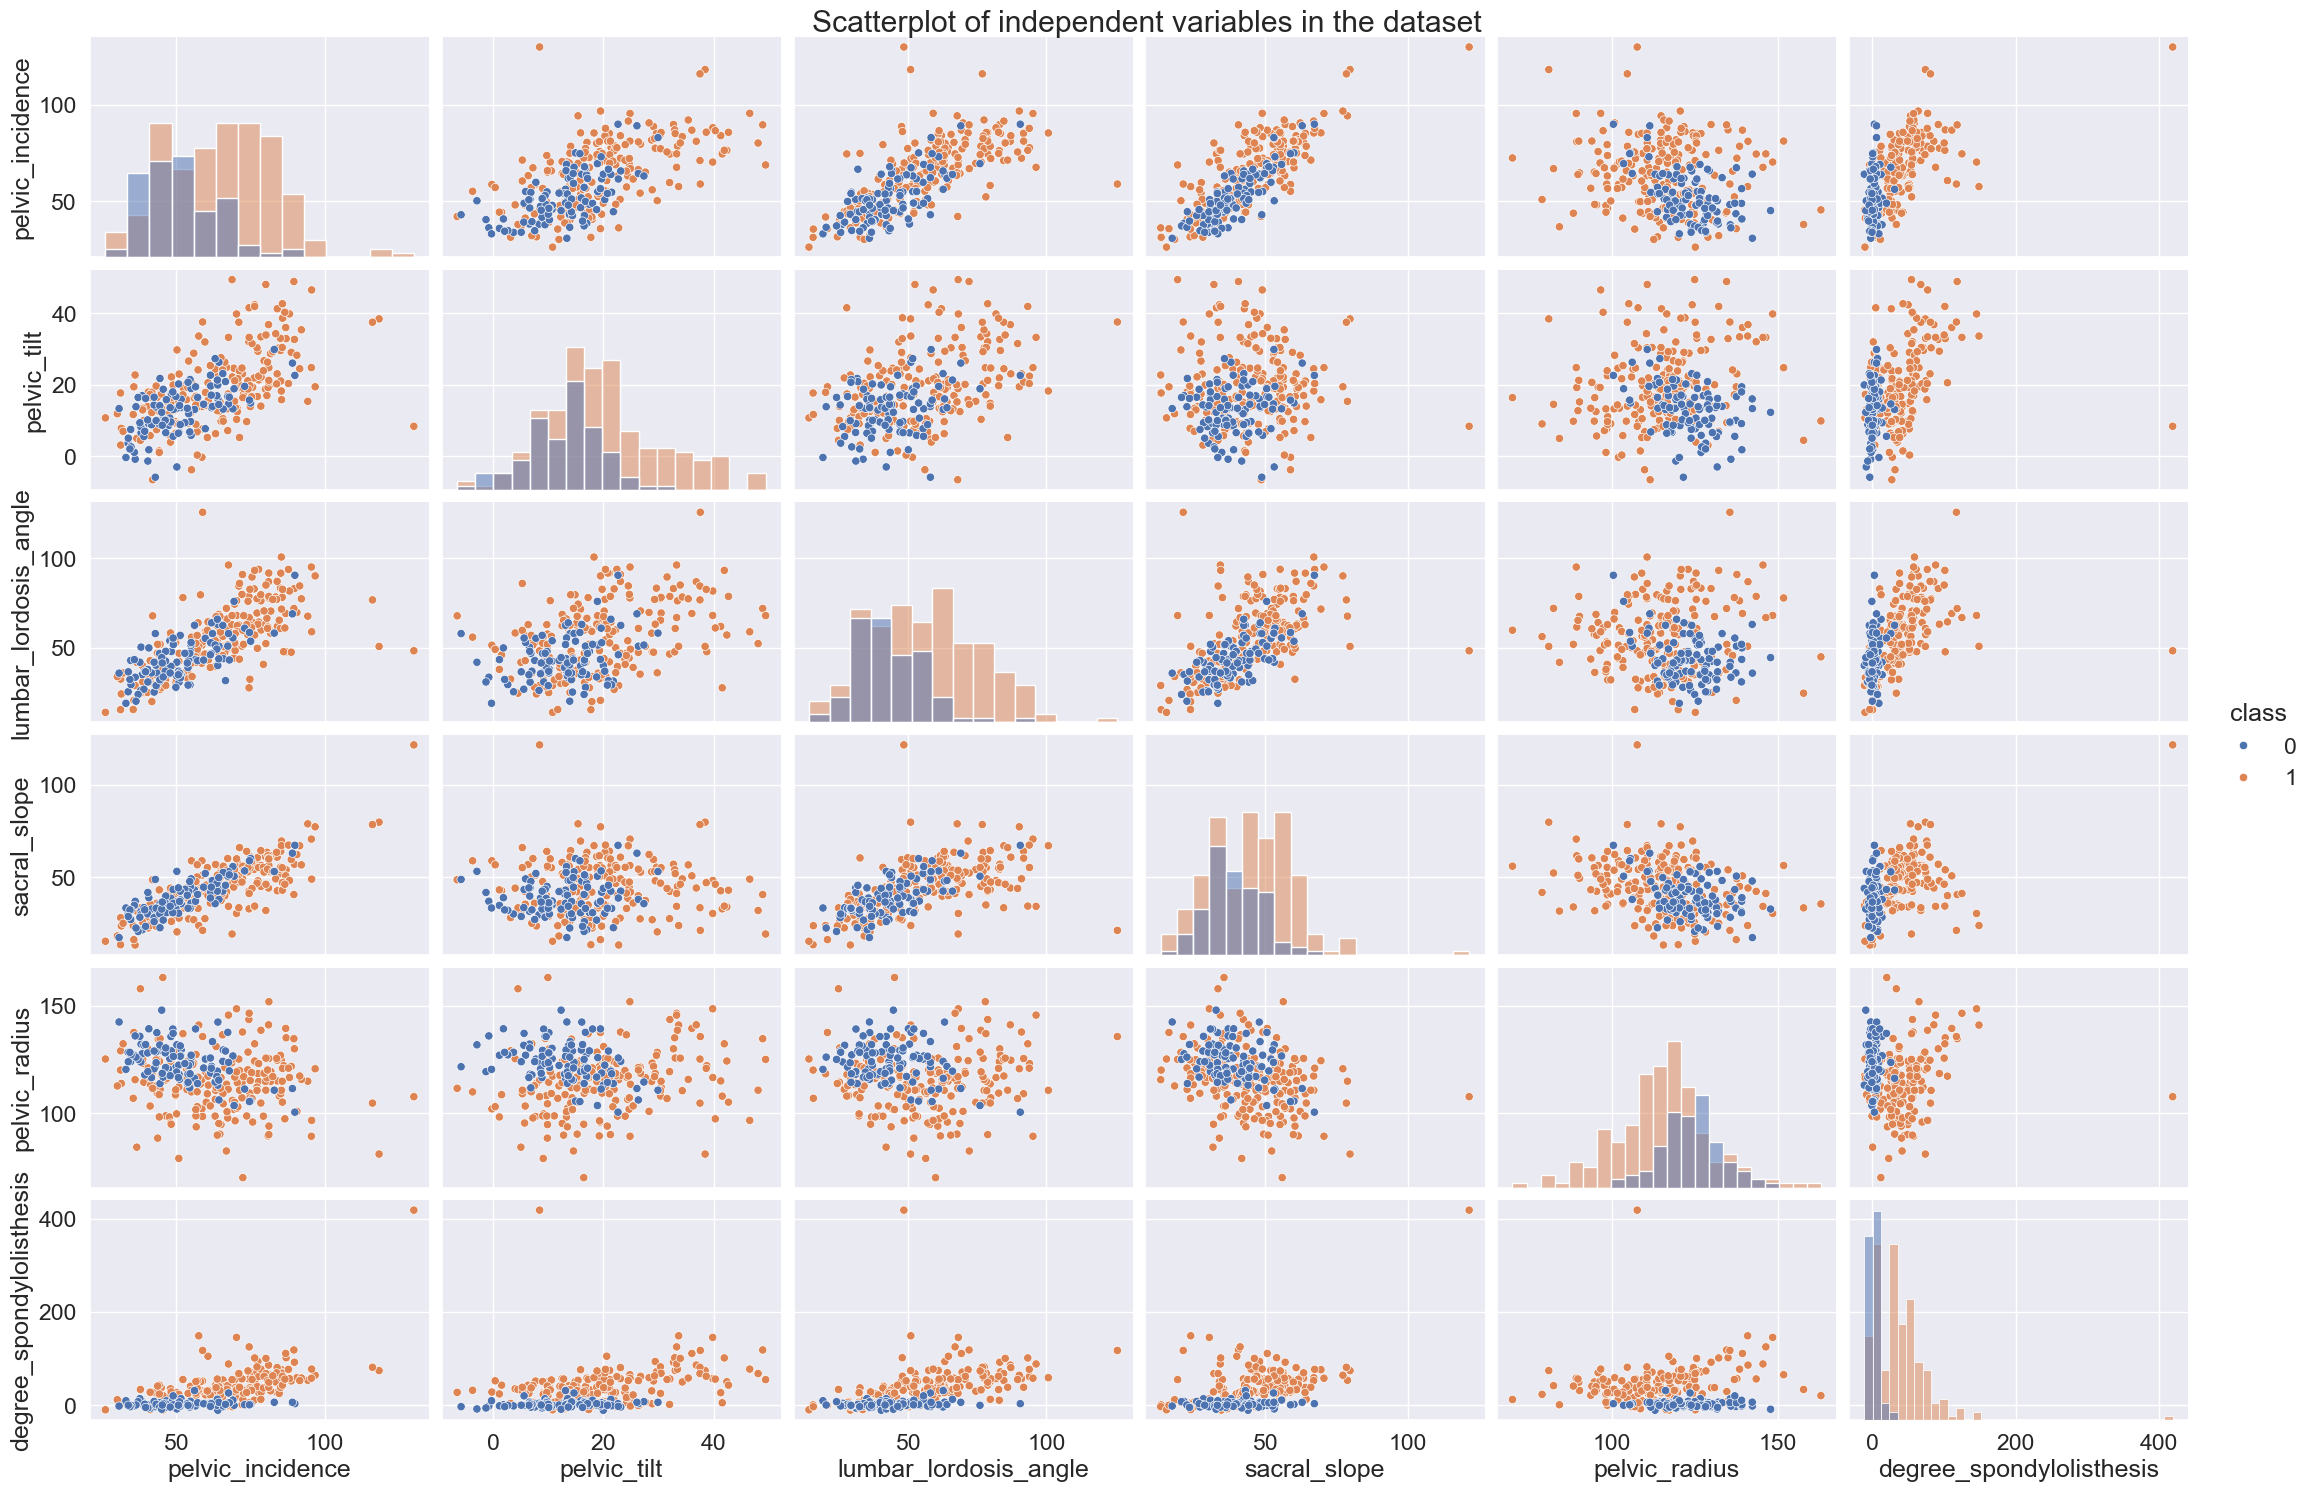

In [4]:
#i. Scatterplot of all the independent variables in the dataset
plt.figure(figsize=(10,5))
sns.set(font_scale=1.5)
sns.pairplot(df1, hue = 'class', diag_kind='hist', aspect = 1.5).fig.suptitle("Scatterplot of independent variables in the dataset", y=1)
plt.show()

<Axes: xlabel='Variable', ylabel='Value'>

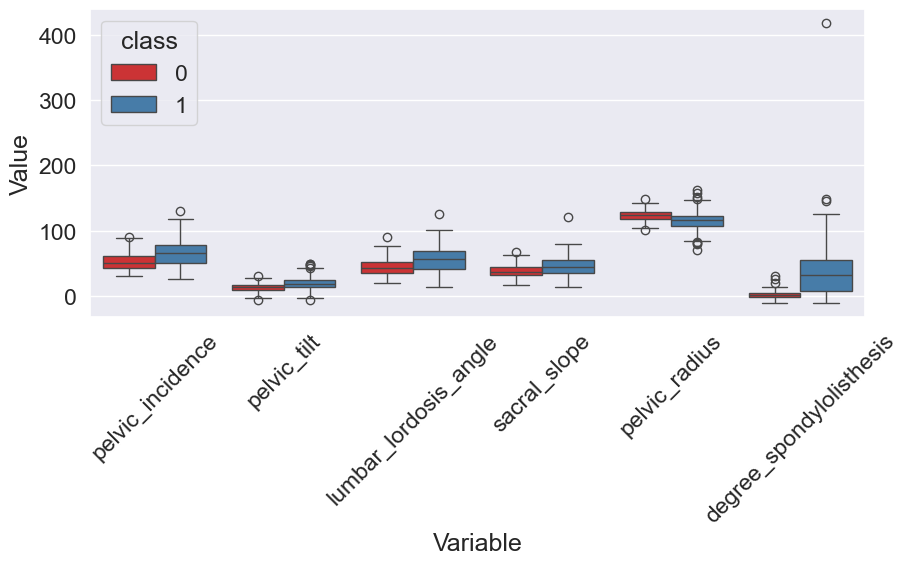

In [5]:
#ii. Boxplot for each independent variable showing classes 0 and 1
df_boxplot = df1
plt.figure(figsize=(10,4))
plt.xticks(rotation = 45)
df_melted = df_boxplot.melt(id_vars="class", var_name="Variable", value_name="Value") #chatgpt: Melt the DataFrame: 
#pd.melt() transforms the DataFrame so that all independent variables are in one column (Variable), with their corresponding values in another column (Value).
sns.boxplot(data=df_melted, x="Variable", y="Value", hue="class", palette="Set1")

In [6]:
#iii. Selecting the first 70 rows of class 0 and 140 rows of class 1 to make the training and testing set
class_0 = df1[df1['class'] == 0]
class_1 = df1[df1['class'] == 1]

X_class_0 = class_0.iloc[:, :-1]
Y_class_0 = class_0.iloc[:, -1]
X_class_1 = class_1.iloc[:, :-1]
Y_class_1 = class_1.iloc[:, -1]

X_train_0, X_test_0, Y_train_0, Y_test_0 = train_test_split(X_class_0, Y_class_0, train_size=70, shuffle = True)
X_train_1, X_test_1, Y_train_1,  Y_test_1 = train_test_split(X_class_1, Y_class_1, train_size=140, shuffle = True)

X_train = pd.concat([X_train_0,X_train_1])
X_test = pd.concat([X_test_0,X_test_1])
Y_train = pd.concat([Y_train_0,Y_train_1])
Y_test = pd.concat([Y_test_0,Y_test_1])

print(f"Train features are {X_train.shape}")
print(f"Train labels are {Y_train.shape}")
print(f"Test features are {X_test.shape}")
print(f"Test labels are {Y_test.shape}")


Train features are (210, 6)
Train labels are (210,)
Test features are (100, 6)
Test labels are (100,)


In [7]:
#Scaling the data since some variables are in the range 0 to 100 and some in the negative
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

### c) Classification using KNN on Vertebral Column Data Set

i. Write code for k-nearest neighbors with Euclidean metric (or use a software package)

In [8]:
#K Neighbours classifier using sci-kit learn library
knn = KNeighborsClassifier(n_neighbors=40, metric = 'euclidean')
knn.fit(X_train, Y_train)

ytrain_pred = knn.predict(X_train)
ytest_pred = knn.predict(X_test)

train_error = 1 - accuracy_score(Y_train, ytrain_pred)
test_error = 1 - accuracy_score(Y_test, ytest_pred)

print("Train error", train_error)
print("Test error", test_error)

Train error 0.17619047619047623
Test error 0.17000000000000004


ii. Test all the data in the test database with k nearest neighbors. Take decisions by majority polling. Plot train and test errors in terms of k for k ∈{208, 205, . . . , 7, 4, 1, }(in reverse order). You are welcome to use smaller increments of k. Which k∗is the most suitable k among those values? Calculate the confusion matrix, true positive rate, true negative rate, precision, and F1-score when k = k∗.

In [9]:
#testing the model with differnet values of k
k_values = list(range(208, 0, -3))
train_errors = []
test_errors = []

for k in k_values:
    classifier = KNeighborsClassifier(n_neighbors = k, metric = 'euclidean') 
    classifier.fit(X_train, Y_train)
    
    Y_train_pred = classifier.predict(X_train)
    Y_test_pred = classifier.predict(X_test)
    
    train_error = 1 - accuracy_score(Y_train, Y_train_pred)
    test_error = 1 - accuracy_score(Y_test, Y_test_pred)
    
    train_errors.append(train_error)
    test_errors.append(test_error)
    

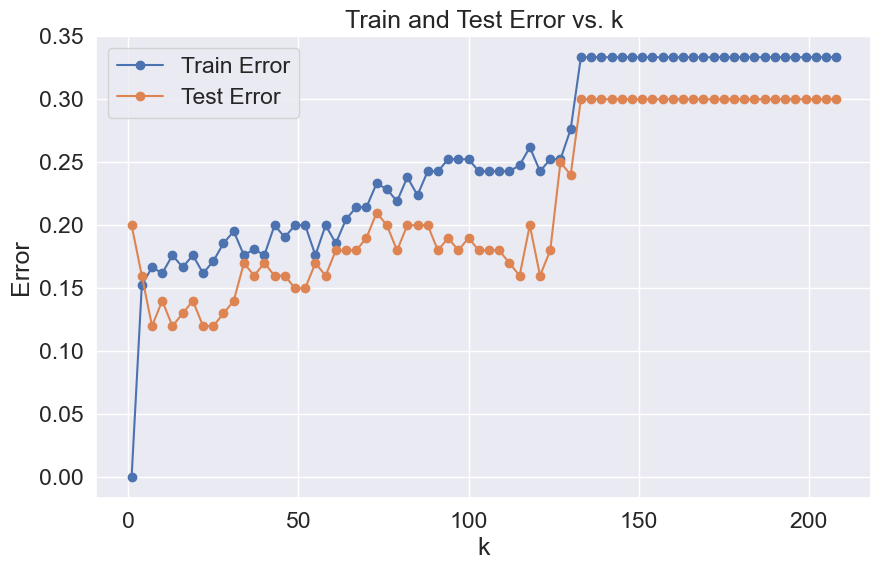

In [10]:
#plot train vstest errors
plt.figure(figsize=(10, 6))
plt.plot(k_values, train_errors, label='Train Error', marker='o')
plt.plot(k_values, test_errors, label='Test Error', marker='o')
plt.xlabel('k')
plt.ylabel('Error')
plt.title('Train and Test Error vs. k')
plt.legend()
plt.grid(True)
plt.show()

In [11]:
#find the best k value as well as the metrics of the model
best_k_index = np.argmin(test_errors)
best_k = k_values[best_k_index]
print(f"The most suitable k is: {best_k}")

best_model = KNeighborsClassifier(n_neighbors=best_k, metric='euclidean')
best_model.fit(X_train, Y_train)    

Y_train_pred = best_model.predict(X_train)
Y_test_pred = best_model.predict(X_test)

train_error = 1 - accuracy_score(Y_train_pred, Y_train)
conf_matrix = confusion_matrix(Y_test, Y_test_pred)
class_report = classification_report(Y_test, Y_test_pred, target_names=['Class 0', 'Class 1'])

print(f"Confusion Matrix:\n {conf_matrix}")
print(f"\nClassification Report:\n {class_report}")
print(f"Training error for k value: {train_error}")

The most suitable k is: 25
Confusion Matrix:
 [[26  4]
 [ 8 62]]

Classification Report:
               precision    recall  f1-score   support

     Class 0       0.76      0.87      0.81        30
     Class 1       0.94      0.89      0.91        70

    accuracy                           0.88       100
   macro avg       0.85      0.88      0.86       100
weighted avg       0.89      0.88      0.88       100

Training error for k value: 0.17142857142857137


iii. Since the computation time depends on the size of the training set, one may only use a subset of the training set. Plot the best test error rate,3 which is obtained by some value of k, against the size of training set, when the size of training set is N ∈ {10, 20, 30, . . . , 210}
Note: for each N , select your training set by choosing the first [N/3] rows of Class 0 and the first
N −  [N/3]rows of Class 1 in the training set you created in 1(b)iii. 
Also, for each N ,select the optimal k from a set starting from k = 1, increasing by 5.
For example, if N = 200, the optimal k is selected from {1, 6, 11, . . . , 196}.
This plot is called a Learning Curve.

Training size: 10, Best k: 1,  Best test error: 0.25
Training size: 20, Best k: 1,  Best test error: 0.22999999999999998
Training size: 30, Best k: 1,  Best test error: 0.18999999999999995
Training size: 40, Best k: 6,  Best test error: 0.18999999999999995
Training size: 50, Best k: 21,  Best test error: 0.28
Training size: 60, Best k: 21,  Best test error: 0.28
Training size: 70, Best k: 26,  Best test error: 0.28
Training size: 80, Best k: 26,  Best test error: 0.27
Training size: 90, Best k: 41,  Best test error: 0.30000000000000004
Training size: 100, Best k: 1,  Best test error: 0.21999999999999997
Training size: 110, Best k: 11,  Best test error: 0.17000000000000004
Training size: 120, Best k: 1,  Best test error: 0.14
Training size: 130, Best k: 1,  Best test error: 0.12
Training size: 140, Best k: 1,  Best test error: 0.08999999999999997
Training size: 150, Best k: 1,  Best test error: 0.07999999999999996
Training size: 160, Best k: 1,  Best test error: 0.06999999999999995
Trai

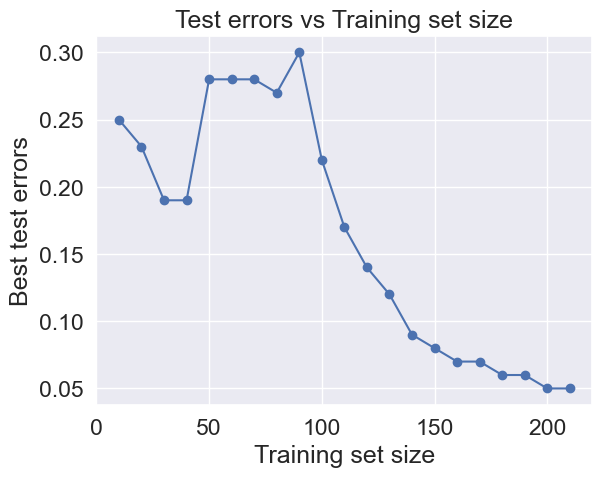

In [12]:
class_0 = df1[df1['class'] == 0]
class_1 = df1[df1['class'] == 1]

k_values = range(1, 210, 5)
n_values = range(10, 211, 10)
best_test_errors = []

X_class_0 = class_0.iloc[:, :-1]
Y_class_0 = class_0.iloc[:, -1]
X_class_1 = class_1.iloc[:, :-1]
Y_class_1 = class_1.iloc[:, -1]

X_test = pd.concat([X_test_0, X_test_1])
Y_test = pd.concat([Y_test_0, Y_test_1])

for n in n_values:
    
    n_class_0 = n // 3
    n_class_1 = n - n_class_0
    
    X_train = pd.concat([X_class_0[:n_class_0], X_class_1[:n_class_1]])
    Y_train = pd.concat([Y_class_0[:n_class_0], Y_class_1[:n_class_1]])
    
    
    best_test_error = float('inf')
    best_k = 1
    
    for k in k_values:
        if k > len(X_train):
            continue 
        knn = KNeighborsClassifier(n_neighbors=k, metric = 'euclidean')
        knn.fit(X_train, Y_train)
        
        Y_pred = knn.predict(X_test)
        test_error = 1 - accuracy_score(Y_test, Y_pred)
        
        if test_error < best_test_error:
            best_test_error = test_error
            best_k = k
    
    best_test_errors.append(best_test_error)
    print(f"Training size: {n}, Best k: {best_k},  Best test error: {best_test_error}")
   
     
plt.plot(n_values, best_test_errors, marker = 'o')
plt.title("Test errors vs Training set size")
plt.xlabel("Training set size")
plt.ylabel("Best test errors")
plt.grid(True)
plt.show()


### d) Replace the Euclidean metric with the following metrics and test them. 
Summarize the test errors (i.e., when k = k∗) in a table. Use all of your training data
and select the best k when {1, 6, 11, . . . , 196}.

i. Minkowski Distance:
 A. which becomes Manhattan Distance with p = 1.

 B. with log10(p) ∈ {0.1, 0.2, 0.3, . . . , 1}. In this case, use the k∗you found
 for the Manhattan distance in 1(d)iA. What is the best log10(p)?
 
 C. which becomes Chebyshev Distance with p →∞

ii. Mahalanobis Distance

In [13]:
X_class_0 = class_0.iloc[:, :-1]
Y_class_0 = class_0.iloc[:, -1]
X_class_1 = class_1.iloc[:, :-1]
Y_class_1 = class_1.iloc[:, -1]

X_train = pd.concat([X_train_0, X_train_1])
Y_train = pd.concat([Y_train_0, Y_train_1])
X_test = pd.concat([X_test_0, X_test_1])
Y_test = pd.concat([Y_test_0, Y_test_1])

In [14]:
k_values = range(1, 200, 5)

def knn_metric(metric, p= None):
    best_test_error = float('inf')
    best_k = 1
    
    for k in k_values:
        knn = KNeighborsClassifier(n_neighbors=k, metric = metric, p = p)
        knn.fit(X_train, Y_train)
        Y_pred = knn.predict(X_test)
        test_error = 1 - accuracy_score(Y_test, Y_pred)
        
        if test_error< best_test_error:
            best_test_error = test_error
            best_k = k
            
    return best_test_error, best_k

 ### * Chatgpt: Mahalanobis Metric *

Prompt: Code for Mahalanobis metric

Reply: 
To use the **Mahalanobis distance** in K-Nearest Neighbors (KNN), you will need to:

1. Compute the covariance matrix of the training data.
2. Compute the inverse of the covariance matrix.
3. Use this inverse covariance matrix in the Mahalanobis distance formula.

Here’s how you can implement KNN with the Mahalanobis distance in Python using `scikit-learn`:

### Steps:

1. **Covariance matrix computation**: Compute the covariance matrix of the data.
2. **Inverse covariance matrix**: Find the inverse of the covariance matrix.
3. **KNN with Mahalanobis Distance**: Use `DistanceMetric` with the `mahalanobis` metric and pass the inverse covariance matrix.

### Code Implementation:

```python
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from scipy.spatial.distance import mahalanobis

# Example dataset (replace with your actual dataset)
# X_train and X_test are feature matrices, Y_train and Y_test are labels
# Assuming X_train and X_test are already split

# Step 1: Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 2: Compute the covariance matrix of the training data
cov_matrix = np.cov(X_train_scaled, rowvar=False)

# Step 3: Compute the inverse of the covariance matrix
inv_cov_matrix = np.linalg.inv(cov_matrix)

# Step 4: Implement KNN with Mahalanobis distance
# Define a custom Mahalanobis distance function
def mahalanobis_distance(x, y):
    return mahalanobis(x, y, inv_cov_matrix)

# Use sklearn's KNeighborsClassifier with the custom Mahalanobis distance
knn = KNeighborsClassifier(n_neighbors=5, metric='mahalanobis', metric_params={'V': inv_cov_matrix})

# Step 5: Train the KNN classifier
knn.fit(X_train_scaled, Y_train)

# Step 6: Predict on the test set
Y_pred = knn.predict(X_test_scaled)

# Step 7: Evaluate the accuracy
test_accuracy = accuracy_score(Y_test, Y_pred)
print(f"Test Accuracy using Mahalanobis distance: {test_accuracy}")

```

### Explanation:
1. **Scaling the data**: We scale the data to have zero mean and unit variance using `StandardScaler`.
2. **Covariance matrix**: The covariance matrix of the training data is computed.
3. **Inverse covariance matrix**: This is required for Mahalanobis distance calculations.
4. **KNN with Mahalanobis Distance**: The `KNeighborsClassifier` from `sklearn` is configured with the `mahalanobis` metric, and the inverse covariance matrix is passed using the `metric_params` parameter.
5. **Model Training and Testing**: The classifier is trained on the scaled training data, and predictions are made on the scaled test data. Finally, the accuracy is computed.

### Important Notes:
- **Covariance matrix issues**: If the covariance matrix is singular or ill-conditioned, it will throw an error. In such cases, you can use a pseudoinverse with `np.linalg.pinv(cov_matrix)` instead of the inverse.
- **Scikit-learn's KNeighborsClassifier**: Supports the Mahalanobis distance directly using the `metric='mahalanobis'` and `metric_params={'V': inverse_covariance_matrix}`.

This code implements KNN with Mahalanobis distance and evaluates the model on the test set.

In [15]:
#1) Manhattan distance
manhattan_test_error, manhattan_best_k = knn_metric('minkowski', p=1)
print(f"Manhattan distance: \n Best k = {manhattan_best_k}, Test error: {manhattan_test_error}")

#2) Minkowski distance with log10(p)
best_log10p = 0
best_p_error = float('inf')

for log_p in np.arange(0.1, 1.1, 0.1):
    p_value = 10 ** log_p
    minkowski_error, _ = knn_metric('minkowski', p = p_value )
    
    if minkowski_error < best_p_error:
        best_p_error = minkowski_error
        best_log10p = log_p

print(f"Minkowski Distance: \n Best log10(p): {best_log10p}, Test error: {best_p_error}")


#3) Chebyshev Distance p = infinity
chebyshev_test_error, chebyshev_best_k = knn_metric('chebyshev')
print(f"Chebyshev Distance: \n Best k: {chebyshev_best_k}, Test error: {chebyshev_test_error}")

#4) Mahalnobis distance 
def mahalanobis_knn(k):
    covariance_matrix = np.cov(X_train, rowvar = False)
    inverse_covariance_matrix = np.linalg.pinv(covariance_matrix)
   
    
    knn = KNeighborsClassifier(n_neighbors=k, metric='mahalanobis', metric_params={"VI": inverse_covariance_matrix})
    knn.fit(X_train, Y_train)
    Y_pred = knn.predict(X_test)
    
    return 1 - accuracy_score(Y_test, Y_pred)


mahalanobis_best_test_error = float("inf")
mahalanobis_best_k = 1

for k in k_values:
    mahalanobis_test_error = mahalanobis_knn(k)
    if mahalanobis_test_error < mahalanobis_best_test_error:
        mahalanobis_best_test_error = mahalanobis_test_error
        mahalanobis_best_k = k
    

print(f"Mahalanobis Distance: \n Best K: {mahalanobis_best_k}, Test error: {mahalanobis_best_test_error}")



Manhattan distance: 
 Best k = 11, Test error: 0.13
Minkowski Distance: 
 Best log10(p): 0.30000000000000004, Test error: 0.10999999999999999
Chebyshev Distance: 
 Best k: 41, Test error: 0.13
Mahalanobis Distance: 
 Best K: 66, Test error: 0.12


In [16]:
#i.B. Using best k from Manhattan distance
best_log10p = 0
best_p_error = float('inf')

for log_p in np.arange(0.1, 1.1, 0.1):
    p_value = 10 ** log_p
    knn = KNeighborsClassifier(n_neighbors=manhattan_best_k, metric = 'minkowski', p = p_value)
    knn.fit(X_train, Y_train)
    Y_pred = knn.predict(X_test)
    test_error = 1 - accuracy_score(Y_test, Y_pred)
    
    if test_error < best_p_error:
        best_p_error = test_error
        best_log10p = log_p

print(f"Minkowski Distance: \n Best log10(p): {best_log10p}, Test error: {best_p_error}")


Minkowski Distance: 
 Best log10(p): 0.30000000000000004, Test error: 0.10999999999999999


In [17]:
summary = pd.DataFrame({
    'Distance Metric' : ['Manhattan', 'Minkowski', 'Chebyshev', 'Mahalanobis'],
    'Best K': [manhattan_best_k, manhattan_best_k, chebyshev_best_k,mahalanobis_best_k ],
    'Best test error': [manhattan_test_error, best_p_error, chebyshev_test_error, mahalanobis_best_test_error]
})

print(summary)

  Distance Metric  Best K  Best test error
0       Manhattan      11             0.13
1       Minkowski      11             0.11
2       Chebyshev      41             0.13
3     Mahalanobis      66             0.12


### e) The majority polling decision can be replaced by weighted decision, in which the weight of each point in voting is inversely proportional to its distance from the query/test data point.

In this case, closer neighbors of a query point will have
a greater influence than neighbors which are further away. Use weighted voting
with Euclidean, Manhattan, and Chebyshev distances and report the best test
errors when k ∈{1, 6, 11, 16, . . . , 196}

In [18]:
def weighted_knn(metric):
    best_error = float("inf")
    best_k = None
    k_values = range(1, 197, 5)
    for k in k_values:
        knn = KNeighborsClassifier(n_neighbors=k, weights="distance", metric = metric)
        knn.fit(X_train, Y_train)
        Y_pred = knn.predict(X_test)
        test_error = 1 - accuracy_score(Y_test, Y_pred)
        
        if test_error< best_error:
            best_error = test_error
            best_k = int(k)
        
    return best_k, best_error

In [19]:
metrics = ['euclidean', 'manhattan', 'chebyshev']

results = {}

for metric in metrics:
    best_k, best_error = weighted_knn(metric)
    results[metric] = {'best k' : best_k, 'best_error':best_error}
    

results_df = pd.DataFrame(results)
print(results_df)


            euclidean  manhattan  chebyshev
best k          11.00     166.00     181.00
best_error       0.11       0.11       0.11


### f) What is the lowest training error you achieved in this homework.
Answer] Lowest training rate for the model is when K = 1 which is 0 error. This model will however overfit when tested on unseen data.

## References

1. Sci-kit learn: https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html
2. KNN: https://www.geeksforgeeks.org/k-nearest-neighbours/
3. KNN distance metrics: https://www.kdnuggets.com/2020/11/most-popular-distance-metrics-knn.html
4. Confusion matrix: https://www.geeksforgeeks.org/confusion-matrix-machine-learning/
